# Basic Cleaning: Handling the missing values ( San Francisco Permits data set)

## Setting up: Install required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
import seaborn as sns

### Read the data file

In [4]:
df1 = pd.read_csv('../data/raw/Building_Permits.csv')

C:\Users\Jishan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory Data Analysis(EDA)

### Check the dimension of the data set

In [3]:
df1.shape

(198900, 43)

### Identification of variables and data types

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
Permit Number                             198900 non-null object
Permit Type                               198900 non-null int64
Permit Type Definition                    198900 non-null object
Permit Creation Date                      198900 non-null object
Block                                     198900 non-null object
Lot                                       198900 non-null object
Street Number                             198900 non-null int64
Street Number Suffix                      2216 non-null object
Street Name                               198900 non-null object
Street Suffix                             196132 non-null object
Unit                                      29479 non-null float64
Unit Suffix                               1961 non-null object
Description                               198610 non-null object
Current Status                            198900 n

In [99]:
df1.head()

Permit Number  Permit Type            Permit Type Definition  \
0  201505065519            4                      sign - erect   
1  201604195146            4                      sign - erect   
2  201605278609            3  additions alterations or repairs   
3  201611072166            8            otc alterations permit   
4  201611283529            6                       demolitions   

  Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
0           05/06/2015  0326  023            140                  NaN   
1           04/19/2016  0306  007            440                  NaN   
2           05/27/2016  0595  203           1647                  NaN   
3           11/07/2016  0156  011           1230                  NaN   
4           11/28/2016  0342  001            950                  NaN   

  Street Name Street Suffix  ...  Existing Construction Type  \
0       Ellis            St  ...                         3.0   
1       Geary            St  ...                         3.0   
2     Pacific            Av  ...                         1.0   
3     Pacific            Av  ...                         5.0   
4      Market            St  ...                         3.0   

  Existing Construction Type Description Proposed Construction Type  \
0                          constr type 3                        NaN   
1                          constr type 3                        NaN   
2                          constr type 1                        1.0   
3                         wood frame (5)                        5.0   
4                          constr type 3                        NaN   

  Proposed Construction Type Description Site Permit Supervisor District  \
0                                    NaN         NaN                 3.0   
1                                    NaN         NaN                 3.0   
2                          constr type 1         NaN                 3.0   
3                         wood frame (5)         NaN                 3.0   
4                                    NaN         NaN                 6.0   

  Neighborhoods - Analysis Boundaries  Zipcode  \
0                          Tenderloin  94102.0   
1                          Tenderloin  94102.0   
2                        Russian Hill  94109.0   
3                            Nob Hill  94109.0   
4                          Tenderloin  94102.0   

                                    Location      Record ID  
0  (37.785719256680785, -122.40852313194863)  1380611233945  
1   (37.78733980600732, -122.41063199757738)  1420164406718  
2    (37.7946573324287, -122.42232562979227)  1424856504716  
3   (37.79595867909168, -122.41557405519474)  1443574295566  
4   (37.78315261897309, -122.40950883997789)   144548169992  

[5 rows x 43 columns]

In [8]:
df1.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


### Summary statistics

In [11]:
summery1=df1.describe().transpose()
print(summery1)

                               count          mean           std  \
Permit Type                 198900.0  7.522323e+00  1.457451e+00   
Street Number               198900.0  1.121729e+03  1.135769e+03   
Unit                         29479.0  7.851718e+01  3.269813e+02   
Number of Existing Stories  156116.0  5.705773e+00  8.613455e+00   
Number of Proposed Stories  156032.0  5.745043e+00  8.613284e+00   
Estimated Cost              160834.0  1.689554e+05  3.630386e+06   
Revised Cost                192834.0  1.328562e+05  3.584903e+06   
Existing Units              147362.0  1.566616e+01  7.447632e+01   
Proposed Units              147989.0  1.651095e+01  7.522044e+01   
Plansets                    161591.0  1.274650e+00  2.240735e+01   
Existing Construction Type  155534.0  4.072878e+00  1.585756e+00   
Proposed Construction Type  155738.0  4.089529e+00  1.578766e+00   
Supervisor District         197183.0  5.538403e+00  2.887041e+00   
Zipcode                     197184.0  9.411550e+

## Exploring intercorrelated numerical variables

In [57]:
#Exclude object type data to draw correlation matrix
df_corr=df1.select_dtypes(exclude=['object'])


In [13]:
df_corr.shape

(198900, 15)

In [16]:
df_corr.corr()

Permit Type  Street Number      Unit  \
Permit Type                    1.000000      -0.002281  0.031978   
Street Number                 -0.002281       1.000000 -0.040662   
Unit                           0.031978      -0.040662  1.000000   
Number of Existing Stories     0.057106      -0.218557  0.167038   
Number of Proposed Stories     0.055431      -0.215047  0.168811   
Estimated Cost                -0.120878      -0.011152 -0.009094   
Revised Cost                  -0.120083      -0.010828 -0.007559   
Existing Units                -0.003030      -0.054865  0.222569   
Proposed Units                -0.013665      -0.055468  0.227423   
Plansets                      -0.011480      -0.003298 -0.081970   
Existing Construction Type    -0.004265       0.228214 -0.217840   
Proposed Construction Type    -0.033203       0.224609 -0.219103   
Supervisor District           -0.049109      -0.131445 -0.027666   
Zipcode                       -0.012200       0.107763  0.003612   
Record ID                     -0.015621      -0.039808 -0.275457   

                            Number of Existing Stories  \
Permit Type                                   0.057106   
Street Number                                -0.218557   
Unit                                          0.167038   
Number of Existing Stories                    1.000000   
Number of Proposed Stories                    0.997356   
Estimated Cost                                0.030248   
Revised Cost                                  0.039181   
Existing Units                                0.295527   
Proposed Units                                0.294521   
Plansets                                      0.009473   
Existing Construction Type                   -0.679218   
Proposed Construction Type                   -0.686347   
Supervisor District                          -0.169487   
Zipcode                                      -0.341470   
Record ID                                    -0.147271   

                            Number of Proposed Stories  Estimated Cost  \
Permit Type                                   0.055431       -0.120878   
Street Number                                -0.215047       -0.011152   
Unit                                          0.168811       -0.009094   
Number of Existing Stories                    0.997356        0.030248   
Number of Proposed Stories                    1.000000        0.050336   
Estimated Cost                                0.050336        1.000000   
Revised Cost                                  0.049165        0.978798   
Existing Units                                0.294658        0.014161   
Proposed Units                                0.304492        0.070412   
Plansets                                      0.009547        0.001451   
Existing Construction Type                   -0.688179       -0.048703   
Proposed Construction Type                   -0.683090       -0.056787   
Supervisor District                          -0.168097        0.009876   
Zipcode                                      -0.342105       -0.010436   
Record ID                                    -0.147121        0.003439   

                            Revised Cost  Existing Units  Proposed Units  \
Permit Type                    -0.120083       -0.003030       -0.013665   
Street Number                  -0.010828       -0.054865       -0.055468   
Unit                           -0.007559        0.222569        0.227423   
Number of Existing Stories      0.039181        0.295527        0.294521   
Number of Proposed Stories      0.049165        0.294658        0.304492   
Estimated Cost                  0.978798        0.014161        0.070412   
Revised Cost                    1.000000        0.015667        0.065279   
Existing Units                  0.015667        1.000000        0.994071   
Proposed Units                  0.065279        0.994071        1.000000   
Plansets                        0.001309        0.001243        0

## Visualize a correlation matrix using seaborn heat map

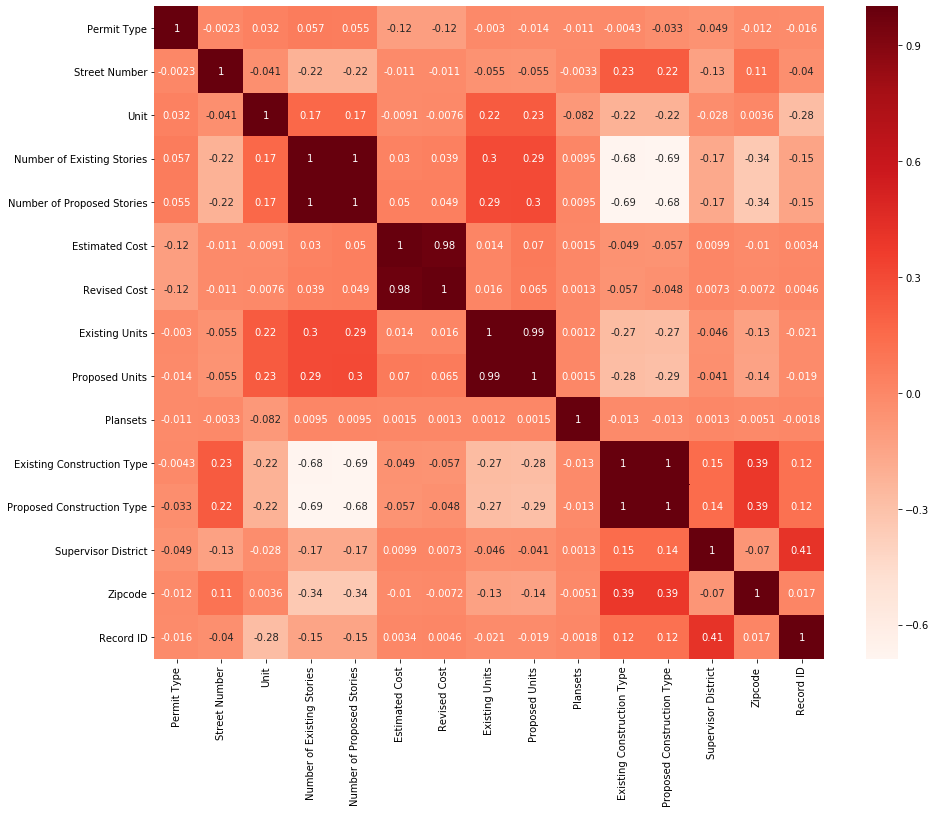

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(df_corr.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

### Determine the highly correlated variables

In [21]:
#Correlation with the target variable
cor_target = abs(df_corr.corr()["Estimated Cost"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Estimated Cost    1.000000
Revised Cost      0.978798
Name: Estimated Cost, dtype: float64

C:\Users\Jishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


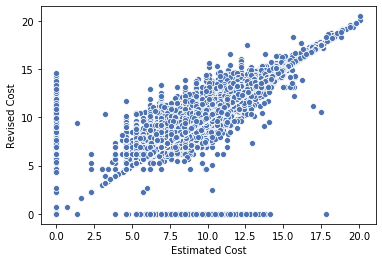

In [59]:
# PLot highly correlated varibales 
sns.scatterplot(x=np.log(df1['Estimated Cost']), y=np.log(df1['Revised Cost']));

# Missing data exploration: highlighting graphical presentation of missing pattern

Identifying the reason of “missingness” is very important. Missingness can occur for the following reasons: 
* It was forgotten or lost;
* It was not applicable to the instance;
* It is of no interest to the instance. 


## Exploring missing pattern: Number of missing values vs. number of  non missing values

In [60]:
#column-wise sum of missing values
print("Columnwise total missing value")
df1.isnull().sum()

Columnwise total missing value


Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [62]:
print("Columniwise total non-missing value")
df1.count()

Columniwise total non-missing value


Permit Number                             198900
Permit Type                               198900
Permit Type Definition                    198900
Permit Creation Date                      198900
Block                                     198900
Lot                                       198900
Street Number                             198900
Street Number Suffix                        2216
Street Name                               198900
Street Suffix                             196132
Unit                                       29479
Unit Suffix                                 1961
Description                               198610
Current Status                            198900
Current Status Date                       198900
Filed Date                                198900
Issued Date                               183960
Completed Date                             97191
First Construction Document Date          183954
Structural Notification                     6922
Number of Existing S

### Missing percentage

In [65]:
# Missing percentage
df1.isnull().sum() / df1.shape[0] * 100.00

Permit Number                              0.000000
Permit Type                                0.000000
Permit Type Definition                     0.000000
Permit Creation Date                       0.000000
Block                                      0.000000
Lot                                        0.000000
Street Number                              0.000000
Street Number Suffix                      98.885872
Street Name                                0.000000
Street Suffix                              1.391654
Unit                                      85.178984
Unit Suffix                               99.014077
Description                                0.145802
Current Status                             0.000000
Current Status Date                        0.000000
Filed Date                                 0.000000
Issued Date                                7.511312
Completed Date                            51.135747
First Construction Document Date           7.514329
Structural N

## Visual presentation of missing data pattern

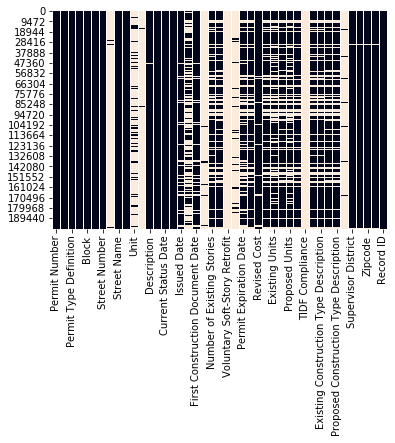

In [25]:
sns.heatmap(df1.isnull(), cbar=False)

 # Handling of the missing data


###  Delete variables with excess(more than 95%) missing data

Dropping features with a more than 50% missing value is usually a good choice but it is risky practice as well. This approach may lead to a loss of predictive capability as well as ability to detect statistically significant differences. As a consequence, It will be challenging for machine learning algorithms to  deal with the limited minority/rare class data. 

Refrence:

Salgado C.M., Azevedo C., Proença H., Vieira S.M. (2016) Missing Data. In: Secondary Analysis of Electronic Health Records. Springer, Cham

In [5]:

new_df2=df1[df1.columns[df1.isnull().mean() < 0.95]]

### Percentages of missing value after dropping variables

In [68]:
new_df2.isnull().sum() / new_df2.shape[0] * 100.00

Permit Number                              0.000000
Permit Type                                0.000000
Permit Type Definition                     0.000000
Permit Creation Date                       0.000000
Block                                      0.000000
Lot                                        0.000000
Street Number                              0.000000
Street Name                                0.000000
Street Suffix                              1.391654
Unit                                      85.178984
Description                                0.145802
Current Status                             0.000000
Current Status Date                        0.000000
Filed Date                                 0.000000
Issued Date                                7.511312
Completed Date                            51.135747
First Construction Document Date           7.514329
Number of Existing Stories                21.510307
Number of Proposed Stories                21.552539
Fire Only Pe

In [69]:
new_df2.shape

(198900, 37)

## Last observation carried forward method
It is a very simple and easy to implement  imputation method. However, It reduces the sample variance but increases the likelihood of Type I error. It is the least preferred method of handling missing data due to it’s biasness. 

Reerence:

Little, R. J., and Rubin, D. B. (2014), Statistical Analysis with Missing Data, New York: Wiley.

In [6]:
df_imputed=new_df2.fillna(method='pad')


In [34]:
df_imputed.isnull().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Name                               0
Street Suffix                             0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
Completed Date                            3
First Construction Document Date          0
Number of Existing Stories                0
Number of Proposed Stories                2
Permit Expiration Date                    0
Estimated Cost                            0
Revised Cost                              0
Existing Use                              0
Existing Units                  

In [70]:
df_imputed.shape

(198900, 43)

### Delete the remaning missing values from the imputed data frame

In [7]:

df_imputed_full =df_imputed.dropna()

In [75]:
df_imputed_full.isnull().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Number Suffix                      0
Street Name                               0
Street Suffix                             0
Unit                                      0
Unit Suffix                               0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
Completed Date                            0
First Construction Document Date          0
Structural Notification                   0
Number of Existing Stories                0
Number of Proposed Stories                0
Voluntary Soft-Story Retrofit   

In [76]:
df_imputed_full.shape

(161267, 43)

## Visualization after handling the missing data

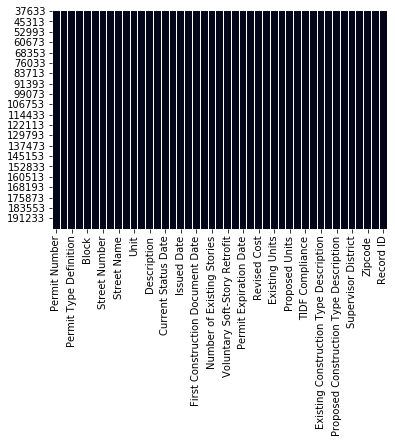

In [77]:
sns.heatmap(df_imputed_full.isnull(), cbar=False)

### Statistical significance of handling missing values

In [8]:
df_est_cost=df1['Estimated Cost']
print("Standar deviation of an estimated cost before handling missing values:\t",  df_est_cost.std())
df_est_cost2=df_imputed_full['Estimated Cost']
print("Standar deviation of an estimated cost after handling missing values:\t", df_est_cost2.std())
df_est_cost=df1['Revised Cost']
print("Standar deviation of a revised cost before handling missing values:\t",  df_est_cost.std())
df_est_cost2=df_imputed_full['Revised Cost']
print("Standar deviation of a revised Cost after handling missing values:\t", df_est_cost2.std())

Standar deviation of an estimated cost before handling missing values:	 3630385.9536701036
Standar deviation of an estimated cost after handling missing values:	 4261418.996957969
Standar deviation of a revised cost before handling missing values:	 3584902.5920340926
Standar deviation of a revised Cost after handling missing values:	 3531125.5809282437


C:\Users\Jishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


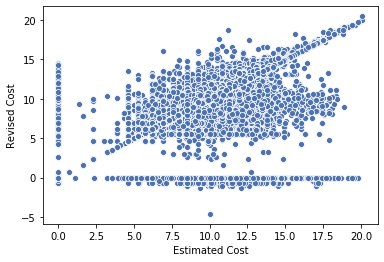

In [87]:
# PLot highly correlated varibales after the handling missing values
sns.scatterplot(x=np.log(df_imputed_full['Estimated Cost']), y=np.log(df_imputed_full['Revised Cost']));

It is noticeable that the association between highly correlated variables and their corresponding standard deviation till remained almost same.  

### Dropping all missing values

Dropping all missing values implies that dropping all observations with any missing values on any variable. This can often be much very  dangerous than our expectation. However, sometimes it's useful to drop one or a few variables with a lot of missing values . It is really important to look carefully at the pattern of the missing values. 

In [97]:
df1_Dropped_all = df1.dropna()
print(df1.shape)
print(df1_Dropped_all.shape)

(198900, 43)
(0, 43)


### Proposed alternative approach

It is not statistically meaningful to perform imputation using mean, median  or interpolated values for the object type variables (e.g. zip code, permit number, phone number etc.) .  I intended to perform last observation carried forward method for qualitative/categorical variables and interpolation techniques for numerical variables simultaneously. I think that It would be a good alternative of existing methods. This proposed approach will require further analysis.

In [9]:
df_imputed_mixed = df1.copy()
for column in df1.columns:
   # print(df1[column].dtype)
    if df1[column].dtype == object:
        df_imputed_mixed[column]=df1[column].fillna(method='bfill')
    else:
       df_imputed_mixed[column]=df1[column].interpolate()
        #print("String!")

In [10]:
df_imputed_mixed.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Number Suffix                         48
Street Name                                   0
Street Suffix                                 0
Unit                                          1
Unit Suffix                                 104
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
Completed Date                                6
First Construction Document Date              0
Structural Notification                      48
Number of Existing Stories              

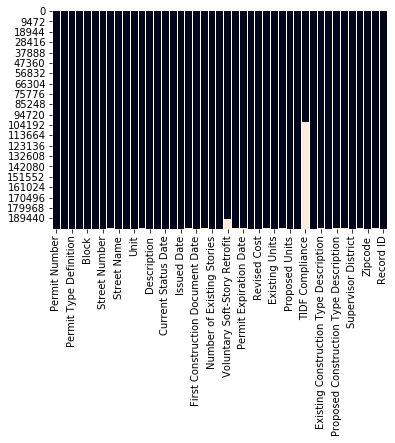

In [11]:
sns.heatmap(df_imputed_mixed.isnull(), cbar=False)